<div style="border:solid Chocolate 2px; padding: 40px">

<b>Hello, Pranita!👋 How are you today?</b>
    
My name is Arina U. and I am glad to be your reviewer in this project! Nice to meet you!<br />


You can find my comments in <font color='green'>green</font>, <font color='gold'>yellow</font> and <font color='red'>red</font> boxes. Examples you can see below:
    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> In case if task is completely correct and everything is alright!
</div>


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  In case when I can give some advice that can help you to improve your work or recommend you some useful links and resources that can help you widen your knowledge and help in future tasks.
</div>

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> In case when step requires some extra work and some corrections. Project can't be accepted with comments in the red boxes
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 

#### <font color='Purple'>Student's commentary:</font> for example like this <a class="tocSkip"> </div>
    
OK, now let's go!😏
</font>

# Analyzing borrowers’ risk of defaulting

- Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.


- Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>

Ok, Pranita,  it is great that you started your project with the short introduction, it is also important to fix the main aim of the project and include the content plan of your work, so, try to do it next time!

## Step 1: Open the data file and have a look at the general information.

In [1]:
#import library with alias 'pd'
import pandas as pd


In [2]:
#read data from file 'credit_scoring_eng.csv'
import pandas as pd

# make data frame from csv file
df = pd.read_csv('/datasets/credit_scoring_eng.csv')

# preview the loaded data
display(df)

df.info()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Conclusion:

- We imported the Pandas library as pd, then read the .csv file using the read_csv method and saved it to the variable 'df'. Then we printed the dataframe using the info() method to see the general information.

- Upon checking data, we found that there is not a column like customer_id, SSN that uniquely identifies a customer. Because of that there's not enough information to conclude that duplicate rows belong to the same customer or not.

- 'days_employed' column found to be negative which is a big red flag as working days should always add-up and must be postive.

- 'days_employed' and 'total_income' columns are float datatype as well. 

- the table/file is not normalized. 'education' and 'family_status' columns can be separated and stored in different tables. These columns can be refered by 'education_id' and 'family_status_id'.


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 

Ok, you have explored the data in detail, pointed out the main problems with the data, so, let's see what results you got at the next steps of the analysis!👀

## Step 2: Data preprocessing

#### In this step, we are viewing the data in more detail to identify missing values, data types and address potential duplicates.

In [3]:
#read data from file 'credit_scoring_eng.csv'
import pandas as pd

# make data frame from csv file
df = pd.read_csv('/datasets/credit_scoring_eng.csv')

# check missing values rows
df.isnull().sum()

# checking the perentage of missing values
#df.isnull().sum()*100/len(df)

#display all missing values columns along with %
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)
display(report)



,missing_values,% of total
children,0,0.0
days_employed,2174,0.1
dob_years,0,0.0
education,0,0.0
education_id,0,0.0
family_status,0,0.0
family_status_id,0,0.0
gender,0,0.0
income_type,0,0.0
debt,0,0.0


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
    
It is important to look not just at the amount of missing values in every column, but at the percentage of missing values in columns, for example, like this:
    
`data.isnull().sum()*100/len(data)`

Or like this:
    
`report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)`

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Pranita, it is great that you tried to check the percent of missing values, but you used the code I suggested not in a very correct way, now your code provides error. So, please, be more attentive here! I am sure it will be easy for you to fix the problem!
        
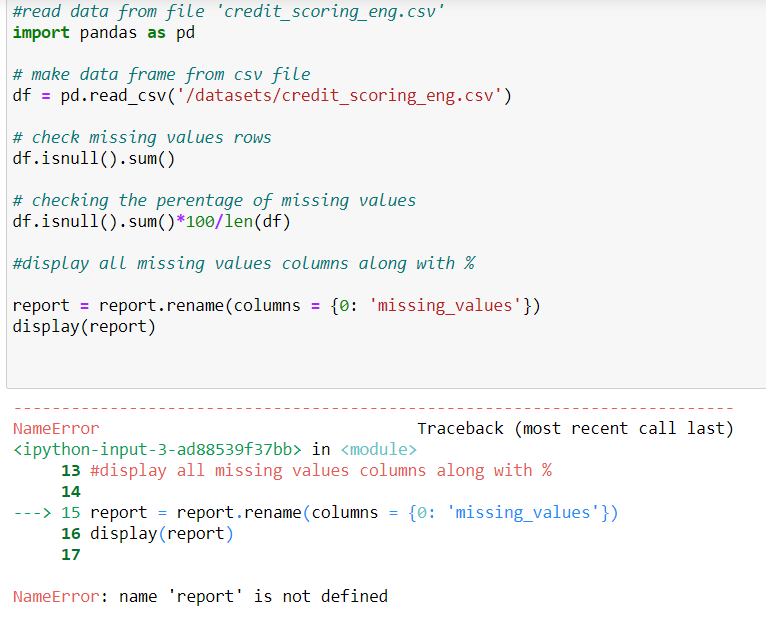

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, this time your code works correctly!

Upon checking data, found out that 
- ‘days_employed’ and ‘total_income‘ have 2,174 missing values. However, we can consider to drop those rows as missing values are only 10 % of the data. We can assume that the customer has not been employed and have no income. We can also backfill 'days_employed' and 'total_income' with mean/median of the columns. If we consider to backfill values, then we have to make sure that it shouldn't make a significant impact on your analysis. To further analyse this issue, we are taking  more actions/steps below.  

- There are 47 records with children as -1. We can raise this issue to concern person. However, 47 records out of 21,525 will not make a big difference so we can assume that negative children equal no children. Steps to replace this value are shown below.

- There are negative values for ‘days_employed’ column. As we know that an individual’s working or employed days cannot be negative, we should raise this question to the concern person. Negative values could be an error of data retrieving process. Actions taken to fix this issue is shown below.


In [4]:
# check data types of columns
print(df.dtypes)


children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object


- 'days_employed' and 'total_income' are float data types.To round up the values we are converting them to whole numbers (whole numbers)

In [5]:
# check for more data discrepancies

#print(df['education'].value_counts())
#print(df['family_status'].value_counts())
print(df['gender'].value_counts())

print(df['children'].value_counts())
#print(df['income_type'].value_counts())
#print(df['purpose'].value_counts())


F      14236
M       7288
XNA        1
Name: gender, dtype: int64
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


-'education' column has duplicate values due to the case-sensitivity. The reason could probably be an programming error (not handling case converting) while collecting data.

-'gender' column has invalid value. It could be probably because there are  people who do not want to disclose their gender or not an option to choose what they want to.

-'children' column has values from -1 to 20. -1 is again invalid and could be error in data retrieving process or they just want to indicate no child or lost child which aren't options there. However, -1 indicates more like no or none to us.So, we are moving 41 records with 'no children' to zero children bucket.

For all the issues above, I would definitely raise to concern person (developers) so that we can get more accurate data in future.


In [6]:
# drop all those rows containing missing values to avoid any error

df.dropna(inplace = True)
# drop duplicates
df.drop_duplicates(inplace = True)
print('Dataframe shape is:', df.shape)


#df.info()

Dataframe shape is: (19351, 12)


- while preprocessing data, we also checked for the existence of duplicate records in the file/table. If there are, dropna(), drop_duplicates() methods will allow us to analyze and drop rows/columns with null values.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Ok, yes, it is better not to remove so great amount of the data from the dataframe, but thnk about the strategies of filling in the missing values or if it is impossible to fill in the missing values we can simply leave missing values in the data unchanged, because sometimes when the procent of the missing values is big and the data is rather sensitive our attempts to fill in missing values using mean or median can be risky in terms of distortion of the original data, so it is important to take it into consideration!👀

## Step 3: Data type replacement

In [7]:
#checking the datatypes to see if datatypes need conversion 
display(df.dtypes)

#calculating descriptive statistics to get idea how data is distributed
df.describe()

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000
mean,0.537388,63046.497661,43.255336,0.819079,0.972249,0.081184,26787.568355
std,1.371408,140827.311974,12.579170,0.550104,1.420596,0.273125,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


- checking data typed of the columns

In [8]:

#step 1: converting negative numbers to positive numbers
df['days_employed'] = abs(df['days_employed'])

#step 2:converting float data numbers into integers
df['days_employed'] = df['days_employed'].astype(int)
df['total_income'] = df['total_income'].astype(int)

#step 3:filling up nullvalues by the median value of the column
df['days_employed'] = df['days_employed'].fillna(value = df['days_employed'].median())
df['total_income'] = df['total_income'].fillna(value=df['total_income'].median())

# step 4:converting all uppercase characters in a string into lowercase charaters
# this converts the column values to string and apply str.lower() function, 
# make it easily to find unique values
df['family_status'] = df['family_status'].str.lower()
df['education'] = df['education'].str.lower()
df['income_type'] = df['income_type'].str.lower()
df['purpose'] = df['purpose'].str.lower()
#df.info()
#print(df['purpose'].value_counts())

# we can choose only those columns that we want to analyze 
#by using this syntax df[[]]
#subset of the columns you want to see
df[['days_employed','total_income','education','family_status','income_type','purpose']]

#calculating descriptive statistics
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000
mean,0.537388,66914.229601,43.255336,0.819079,0.972249,0.081184,26787.071262
std,1.371408,139030.879867,12.579170,0.550104,1.420596,0.273125,16475.452412
min,-1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,3306.000000
25%,0.000000,926.500000,33.000000,1.000000,0.000000,0.000000,16488.000000
50%,0.000000,2194.000000,42.000000,1.000000,0.000000,0.000000,23202.000000
75%,1.000000,5537.000000,53.000000,1.000000,1.000000,0.000000,32549.500000
max,20.000000,401755.000000,75.000000,4.000000,4.000000,1.000000,362496.000000


In [9]:

#step 5: fixing data discrepancies using loc method to replace invalid column values

df.loc[df.gender =='XNA','gender']='Unknown'
print(df['gender'].value_counts())

df.loc[df.children == -1,'children'] = 0
print(df['children'].value_counts())
#print(df['purpose'].value_counts())
print(df['education'].value_counts())

df.info()

F          12752
M           6598
Unknown        1
Name: gender, dtype: int64
0     12754
1      4343
2      1851
3       294
20       67
4        34
5         8
Name: children, dtype: int64
secondary education    13693
bachelor's degree       4716
some college             675
primary education        261
graduate degree            6
Name: education, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21524
Data columns (total 12 columns):
children            19351 non-null int64
days_employed       19351 non-null int64
dob_years           19351 non-null int64
education           19351 non-null object
education_id        19351 non-null int64
family_status       19351 non-null object
family_status_id    19351 non-null int64
gender              19351 non-null object
income_type         19351 non-null object
debt                19351 non-null int64
total_income        19351 non-null int64
purpose             19351 non-null object
dtypes: int64(7), object(5)


### Conclusion:

There will always be potential bad data as nothing is perfect in this world. Possible reasons why there are data discrepancies are probably because:
    a) users forgot to fill in
    b) not an option to choose what they prefer to choose or users choose not to fill in data
    c) data lost while retrieving
    d) programming error
    e) and many more
As a good practice, an analyst should always start by finding, cleansing and organizing data before beginning the real analysis.
To do that: 
- We used astype() method  to change 'days_employed' and 'total_income' to integer and abs()method to remove negative numbers.

- We used fillna() method to backfill 'days_employed' and 'total_income' columns with mean.

- We used loc() method to replace invalid values. We could take that decision because those values are significantly less (.1% of overall data) and will not make impact on the analysis. Apparently, the goal here is to fix as much as we can so that we can get accurate analysis.

- There are duplicates in the 'education', 'family_status','income_type' and 'purpose' columns due to case-sensitivity. We converted the values to lower-case using str.lower() method. There are similar values in those columns which we can be handled in the step 5 through stemming and lemmatization.

- We used median values of the columns 'days_employed' and 'total_income' to replace missing values respectively. Mean,median and mode are the appropriate ways to replace missing values and measure central tendency of data. In our case, there are several large values of data points which act as outliers in 'days_employed' and 'total_income' columns. For example, 'days_employed' value range from 139.53 to 401755.40. Hence, it is not recommended to use mean for replacing the missing values. Instead, we used median imputation. When data is skewed, it is good to consider using median value. 
 


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b>
       
Pranita, I have some recommendations for you at this step of the analysis:
        
1) you noticed earlier that the column `days_employed` has negative values, so it is better to get rid of them before filling in missing values, so use `abs()` method to fix this moment. So, firstly you need to change the data type from `float` to `int` an then use `abs()` method that can help you to get rid of negative values in the column `days_employed`, because in reality we cannot have a negative days of employment
        
2) some of the columns have error values, for example XNA in gender, -1 and 20 in children, it is better to investigate all the columns for such values and offer a strategy of dealing with such anomalies and artefacts values.
        
3) as for filling in missing values: you used the mean, but it is better to use median, because this statistics is more resistant to outliers. As a whole I would like to recommend you to be more careful with handling missing values first you should check how large their share is.
        
So, finally is important to understand the nature of the missing values, formulate hypotheses or reasons for the presence of missing values in the data, and based on these hypotheses, try to choose a way to fill the data. It is important to understand that replacing missing values with a simple median or mean by column can significantly distort the original data if the percentage of gaps in the columns exceeds 10%.
    
So here you can use grouping method, when you try to understand what factors can be connected to each other and use `groupby` method for aggregating and filling in the data. For example, you can check the typical values of the client, depending on the age, education and type of employment of the client. Or check other dependencies. You can lso use correlation to check the dependancies and then use grouping method to restore the data.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, it is great that you tried to follow my recommendations in some cases, you preprocess the anomalies in column children and gender correctly.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, it is correct action to use the str.lower here, it can help to remove some dublicates in column education especially!

## Step 4: Processing duplicates

In [10]:
#finding duplicate data
#print(df[df.duplicated(subset = None, keep = 'first')])
print(df.duplicated().sum())
print(df[df.duplicated()])
df.info()





0
Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21524
Data columns (total 12 columns):
children            19351 non-null int64
days_employed       19351 non-null int64
dob_years           19351 non-null int64
education           19351 non-null object
education_id        19351 non-null int64
family_status       19351 non-null object
family_status_id    19351 non-null int64
gender              19351 non-null object
income_type         19351 non-null object
debt                19351 non-null int64
total_income        19351 non-null int64
purpose             19351 non-null object
dtypes: int64(7), object(5)
memory usage: 1.9+ MB


## Conclusion:

After we are done with preprocessing, we dropped duplicates at the end, just in case, if there are any left. It is a good practice to check duplicates and delete them after we're done with the rest of the preprocessing.

## Step 5:  Categorizing Data

In [11]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemma = WordNetLemmatizer()

#import pandas as pd
#df = pd.read_csv('/datasets/credit_scoring_eng.csv')

#df['purpose'] = df['purpose'].str.lower()
#print(df['purpose'])

# copying modified dataframe
df = df.copy()

def lemma_words(row):
    return [wordnet_lemma.lemmatize(word, pos='n') for word in nltk.word_tokenize(row)]

#lemmatizing with lemmatize() method
df['purpose'] = df['purpose'].apply(lemma_words)
#print(df['purpose'].value_counts())

# 'purpose_category' function will put customer into categories
def purpose_category(row):
    if 'car' in row:
        return 'car'
    elif 'house' in row  or 'rent' in row or 'resident' in row or'estate' in row or 'property' in row:
        return 'house'
    elif 'wedding' in row:
        return 'wedding'
    elif 'education' in row or 'university' in row:
        return 'education'
            
df['purpose'] = df['purpose'].apply(purpose_category)
print(df['purpose'].value_counts())

loan_dict = df[['days_employed', 'debt', 'total_income', 'purpose']]
loan_dict = loan_dict.drop_duplicates().reset_index(drop=True)
print(loan_dict)




house        8050
car          3897
education    3240
wedding      2099
Name: purpose, dtype: int64
       days_employed  debt  total_income    purpose
0               8437     0         40620      house
1               4024     0         17932        car
2               5623     0         23341      house
3               4124     0         42820  education
4             340266     0         25378    wedding
...              ...   ...           ...        ...
19346           4529     0         35966       None
19347         343937     0         24959        car
19348           2113     1         14347      house
19349           3112     1         39054        car
19350           1984     0         13127        car

[19351 rows x 4 columns]


### Conclusion:

We created a function using if rules to categorize 'purpose' column to sort the data into four unique categories. This allowed us to categorize the data based on one of the four for basic categories. We did that by lemmatizing the data in 'purpose' column.
We created 'loan_dict' dictionary and dropped all the duplicates to make our data unique and get more accurate analysis at the end.


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, I agree with your decision and actions here! You correctly conducted the categorization of the data,  good job! 

## Answer these questions

- Is there a relation between having kids and repaying a loan on time?

In [12]:
# replacing/copy modified dataframe 
df = df.copy()
#df.info()
#display(df.dtypes)

children_debt = df[['children', 'debt']].copy()
#print(children_debt.groupby('children'))


def children_debt_func(row):
    children = row['children']
    debt = row['debt']
    if children == 0 and debt == 0 :
        return 'no_children_paid'
    elif children == 0 and debt == 1: 
        return 'no_children_unpaid'
    elif children == 1 and debt == 0:
        return 'one_children_paid'
    elif children == 1 and debt == 1:
        return 'one_children_unpaid'
    elif children == 2 and debt == 0: 
        return 'two_children_paid'
    elif children == 2 and debt == 1: 
        return 'two_children_unpaid'
    elif children == 3 and debt == 0:
        return 'three_children_paid'
    elif children == 3 and debt == 1: 
        return 'three_children_unpaid'
    elif children == 4 and debt == 0:
        return 'four_children_paid'
    elif children == 4 and debt == 1: 
        return 'four_children_unpaid'
    elif children == 5 and debt == 0:
        return 'five_children_paid'
    elif children == 5 and debt == 1: 
        return 'five_children_unpaid'
    elif children == 20 and debt == 0: 
         return 'twenty_children_paid'
    elif children == 20 and debt == 1: 
        return 'twenty_children_unpaid'

# function to be applied to each column of datafram
children_debt['children_debt_group'] = children_debt.apply(children_debt_func, axis=1)


#children_debt['children_total'] = children_debt.groupby('children')['debt'].count()

children_debt = children_debt.dropna()
children_debt = children_debt['children_debt_group'].value_counts()
#print(children_debt.head(10))

#calculating loans(paid and uppaid) grouped by number of childrens
no_children_total = children_debt['no_children_unpaid'] + children_debt['no_children_paid']
one_children_total = children_debt['one_children_unpaid'] + children_debt['one_children_paid']
two_children_total = children_debt['two_children_unpaid'] + children_debt['two_children_paid']
three_children_total = children_debt['three_children_unpaid'] + children_debt['three_children_paid']
four_children_total = children_debt['four_children_unpaid'] + children_debt['four_children_paid']
#five_children_total = children_debt['five_children_unpaid'] + children_debt['five_children_paid']

#calculating loan rate per number of children
no_children_loan_rate = children_debt['no_children_unpaid'] / no_children_total
one_children_loan_rate = children_debt['one_children_unpaid'] / one_children_total
two_children_loan_rate = children_debt['two_children_unpaid'] / two_children_total
three_children_loan_rate = children_debt['three_children_unpaid'] / three_children_total
four_children_loan_rate = children_debt['four_children_unpaid'] /four_children_total
#five_children_loan_rate = children_debt['five_children_unpaid'] / five_children_total

#there were only 9 indiviuals in the data set with 5 children so I excluded them

twenty_children_total = children_debt['twenty_children_unpaid'] + children_debt['twenty_children_paid']
twenty_children_loan_rate = children_debt['twenty_children_unpaid'] / twenty_children_total

print('no kid repays loans {:.2%}'.format(no_children_loan_rate))

print('one kid repays loans {:.2%}'.format(one_children_loan_rate))

print('two kids repays loans {:.2%}'.format(two_children_loan_rate))

print('three kids repays loans {:.2%}'.format(three_children_loan_rate))

print('four kids repays loans {:.2%}'.format(four_children_loan_rate))

#print('five kids pay loans {:.2%}'.format(five_children_loan_rate))

print('twenty kids pay loans {:.2%} '.format(twenty_children_loan_rate))


no kid repays loans 7.47%
one kid repays loans 9.39%
two kids repays loans 9.56%
three kids repays loans 7.48%
four kids repays loans 8.82%
twenty kids pay loans 11.94% 


### Conclusion:

- Customer with no child has repay rate of 7.47% .
- Customer with one child has repay rate of 9.39%.
- Customer with two children has repay rate of 9.56%.
- Customer with three children has repay rate of 7.48%.
- Customer with four children has repay rate of 8.82%.
  *Removed customer with five children as there are only 9 entries for that   category.
- Customer with 20 children has repay rate of 11.94%.

- The data above shows that the repay rate of the customer who has no kid is less than those customers who have one or more kids. As the number of children increase, the repay rate also increase slightly (except for customer with three children). This proves that there is a correlation between the number of kids and repaying ability. With extra expense with kids, customers tend to delay the  their loan payment.


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Pranita, as a whole you came to the correct conclusion at this step of the analysis, good job!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
But I have some important recommendations for you that consider the way you formatted your code and the decision:
       
1) I cannot understand why you downloaded the data again and make some preprocessing. It is better to preprocess the data at the preprocessing step, here you don't need to make preprocessing again. You can simply use the cope of your data using `copy()` method.
       
2) as for the analysis: you can create a simple pivot table (using pivot_table method or groupby() method here). So, for example, you can use pivot_table in which as an index you take column children, as value - debt and as aggfunc you can use several aggregate functions: count, sum and mean or median. Also, you can add information about the percentage (ratio) of loan repayment, as you have already done here. So, try to optimize your decision!


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, it is great that you tried to use copy of the initial data, it is one of the best practices when you are working with code!

- Is there a relation between marital status and repaying a loan on time?

In [13]:
#import nltk
#from nltk.stem import WordNetLemmatizer
#wordnet_lemma = WordNetLemmatizer()

#from collections import Counter

#import pandas as pd
#df = pd.read_csv('/datasets/credit_scoring_eng.csv')

#df_null = df[df['days_employed'].isnull()]

#df['days_employed'] = df['days_employed'].fillna(value=df['days_employed'].median())
#df['total_income'] = df['total_income'].fillna(value=df['total_income'].median())
#df['days_employed'] = df['days_employed'].astype(int)
#df['total_income'] = df['total_income'].astype(int)

#df['education'] = df['education'].str.lower()

# function to convert words in 'purpose' column to it'sa base form (lemmatization)
#def lemma_words(row):
  #  return [wordnet_lemma.lemmatize(word, pos='n') for word in nltk.word_tokenize(row)]
#df['purpose'] = df['purpose'].apply(lemma_words)

#def lemma_category(row):
   # if 'car' in row:
     #   return 'car'
    #if 'house' in row  or 'rent' in row or 'resident' in row or'estate' in row or 'property' in row:
     #   return 'house'
   # if 'wedding' in row:
       # return 'wedding'
    #if 'education' in row or 'university':
       # return 'education'
            
#df['purpose'] = df['purpose'].apply(lemma_category)

# copying modified dataframe
df= df.copy()
marital_debt = df[['family_status', 'family_status_id', 'debt']].copy()
marital_debt = marital_debt.dropna()
marital_debt_count = marital_debt['family_status'].value_counts()



#marital_debt_count
def marital_debt_func(row):
    status = row['family_status_id']
    debt = row['debt']
    
    if status == 0 and debt == 0 :
        return 'married_paid'
    elif status == 0 and debt == 1:
        return 'married_unpaid'
    elif status == 1 and debt == 0 :
        return 'civil_paid'
    elif status == 1 and debt == 1 :
        return 'civil_unpaid'
    elif status == 2 and debt == 0:
        return 'widow_paid'
    elif status == 2 and debt == 1:
        return 'widow_unpaid'
    elif status == 3 and debt == 0 :
        return 'divorced_paid'
    elif status == 3 and debt == 1 :
        return 'divorced_unpaid'
    elif status == 4 and debt == 0:
        return 'unmarried_paid'
    elif status == 4 and debt == 1:
        return 'unmarried_unpaid'
        
marital_debt['marital_debt_group'] = marital_debt.apply(marital_debt_func, axis=1)
marital_debt = marital_debt.dropna()
marital_debt_group_counts = marital_debt['marital_debt_group'].value_counts()

# calculating total per marital status
married_total = marital_debt_count['married']
civil_total = marital_debt_count['civil partnership']
widow_total = marital_debt_count['widow / widower']
divorced_total = marital_debt_count['divorced']
unmarried_total = marital_debt_count['unmarried']

# calculating total loan per marital status
married_unpaid_rate = marital_debt_group_counts['married_unpaid'] / married_total
civilpartner_unpaid_rate = marital_debt_group_counts['civil_unpaid'] / civil_total
widow_unpaid_rate = marital_debt_group_counts['widow_unpaid'] / widow_total
divorced_unpaid_rate = marital_debt_group_counts['divorced_unpaid'] / divorced_total
unmarried_unpaid_rate = marital_debt_group_counts['unmarried_unpaid'] / unmarried_total


print('Married repay rate {:.2%}' .format(married_unpaid_rate))

print('Civil Partnership repay rate {:.2%} '.format(civilpartner_unpaid_rate))

print('Widowed repay rate {:.2%} '.format(widow_unpaid_rate))

print('Divorced repay rate {:.2%} '.format(divorced_unpaid_rate))

print('Unmarried repay rate  {:.2%} '.format(unmarried_unpaid_rate))


Married repay rate 7.59%
Civil Partnership repay rate 9.08% 
Widowed repay rate 6.47% 
Divorced repay rate 7.02% 
Unmarried repay rate  10.06% 


### Conclusion:
- Married customer default on their loans 7.59% of the time
- Civil Partnership customer default on their loans 9.08% of the time
- Widowed customer default on their loans 6.47% of the time
- Divorced customer default on their loans 7.02% of the time
- Unmarried customer default on their loans 10.06% of the time

- Based on the above numbers, married, widowed, and divorced customers have more    financial capacity compared to the unmarried or civil partnership ones. That's probably because married customers have shared assets whereas unmarried customers are young and working to make assets.



<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Ok, again, the resulst are correct, but you can try to optimize solution if you can!🙂
       
And again, there is no need to conduct the preprocessing, categorization again!

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, good!

- Is there a relation between income level and repaying a loan on time?

In [14]:

# copying modified dataframe
df = df.copy()


# using describe() to get a statistic summary on 'income_description'
income_description = df['total_income'].describe()

#print(income_description)
low_income = income_description['25%']
#print(low_income)
mid_income = income_description['50%']
#print(mid_income)
high_income = income_description['75%']
#print(high_income)

def income_debt_func(row):
    income = row['total_income']
    debt = row['debt']
    
    if income <= low_income and debt == 0 :
        return 'low_income_paid'
    elif income <= low_income and debt == 1 :
        return 'low_income_unpaid'
    elif income <= high_income and debt == 0:
        return 'mid_income_paid'
    elif income <= high_income and debt == 1 :
        return 'mid_income_unpaid'
    elif income >= high_income and debt == 0:
        return 'high_income_paid'
    elif income >= high_income and debt == 1:
        return 'high_income_unpaid'
    
df['income_debt_group'] = df.apply(income_debt_func,axis=1)

income_debt_groups = df['income_debt_group'].value_counts()
# total per income
total_low_income  = income_debt_groups['low_income_unpaid'] + income_debt_groups['low_income_paid']
total_mid_income  = income_debt_groups['mid_income_unpaid'] + income_debt_groups['mid_income_paid']
total_high_income = income_debt_groups['high_income_unpaid'] + income_debt_groups['high_income_paid']

#total loan per income 
low_income_loan_rate  = income_debt_groups['low_income_unpaid'] / total_low_income
mid_income_loan_rate  = income_debt_groups['mid_income_unpaid'] / total_mid_income
high_income_loan_rate = income_debt_groups['high_income_unpaid'] / total_high_income

print('lower income repay rate {:.2%} '.format(low_income_loan_rate))
print('medium income repay rate {:.2%} '.format(mid_income_loan_rate))
print('high income replay  rate {:.2%} '.format(high_income_loan_rate))


lower income repay rate 7.92% 
medium income repay rate 8.75% 
high income replay  rate 7.05% 


### Conclusion:

- People with low-income default on their loans 7.92% of the time
- People with medium income default on their loans 8.75% of the time
- People with high income default on their loans 7.05% of the time

- After analyzing the repay rate for the different income groups, we could not    find a clear correlation between level of income and repay ability. The     difference of all repay were approximately 1% for each level of income. Hence, we could not find a connection between level of income and ability to repay a loan. It is probably because the rules and regulations of bank, on amount of loan that a family can get borrow depends on the household income. This policy of reducing the amount of loan a family can afford helps to reduce the potential for default on loan.


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Ok, you are right as a whole, but try to optimize your decision here too!

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
You decision now looks much better, keep it up!

- How do different loan purposes affect on-time repayment of the loan?

In [15]:
# copying modified dataframe
df = df.copy()
   
purpose_counts = df['purpose'].value_counts()
#print(purpose_counts)

# apply function     
def purpose_debt_func(row):
    purpose = row['purpose']
    debt = row['debt']
    if purpose == 'house' and debt == 0:
        return 'paidhouse'
    elif purpose == 'house' and debt == 1:
        return 'unpaidhouse'
    elif purpose == 'education' and debt == 0:
        return 'paideducation'
    elif purpose == 'education' and debt == 1:
        return 'unpaideducation'
    elif purpose == 'car' and debt == 0:
        return 'paidcar'
    elif purpose == 'car' and debt == 1:
        return 'unpaidcar'
    elif purpose == 'wedding' and debt == 0:
        return 'paidwedding'
    elif purpose == 'wedding' and debt == 1:
        return 'unpaidwedding'
    
df['purpose_debt_group'] = df.apply(purpose_debt_func, axis=1)

purpose_group_counts = df['purpose_debt_group'].value_counts()
#print(purpose_group_counts)

#calculating loan rate per purpose
purpose_house_loan_rate = purpose_group_counts['unpaidhouse'] / purpose_counts['house']
purpose_education_loan_rate = purpose_group_counts['unpaideducation'] / purpose_counts['education']
purpose_car_loan_rate = purpose_group_counts['unpaidcar'] / purpose_counts['car']
purpose_wedding_rate = purpose_group_counts['unpaidwedding'] / purpose_counts['wedding']

print('house loan repay rate{:.2%}'.format(purpose_house_loan_rate))
print('education loan repay rate{:2%}'.format(purpose_education_loan_rate))
print('car loan repay rate{:.2%}'.format(purpose_car_loan_rate))
print('wedding loan repay rate {:.2%}'.format(purpose_wedding_rate))



        



house loan repay rate7.42%
education loan repay rate9.166667%
car loan repay rate9.42%
wedding loan repay rate 7.53%


### Conclusion:

- Customer with real estate loan default 7.42% of the time
- Customer with education loan for default 9.17% of the time
- Customer with car loan for default 9.42% of the time
- Customer with wedding default 7.53% of the time
 
- After analyzing repay rate based on customers' loan purpose, we found that real estate rate is better. It’s probably because those customers who are financially stable would only invest in real state. For customer with wedding loan, the rate is second lower because these customer will have's extra financial support from their spouse. For customer with car loan,the rate is higher. It's probably because the car loan tends to have lesser restriction to borrow money. It is also possible that there is unknown maintenance cost for the car. It is possible that the expense to fix the car push borrower to delay the loan payment. Education loans repay rate is higher as customers are much younger and have no stable career.




<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Ok, agree with you, you have formulated a rather comprehensive conclusion here but is it better to think about the ways of optimization of your decision and reuse of the code.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍</b> 

## Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [x]  file examined;
- [x]  missing values defined;
- [x]  missing values are filled;
- [x]  an explanation of which missing value types were detected;
- [x]  explanation for the possible causes of missing values;
- [x]  an explanation of how the blanks are filled;
- [x]  replaced the real data type with an integer;
- [x]  an explanation of which method is used to change the data type and why;
- [x]  duplicates deleted;
- [x]  an explanation of which method is used to find and remove duplicates;
- [x]  description of the possible reasons for the appearance of duplicates in the data;
- [x]  data is categorized;
- [x]  an explanation of the principle of data categorization;
- [x]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [x]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [x]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [x]  conclusions are present on each stage;
- [x]  a general conclusion is made.

## General conclusion:

Based on the analysis above, we can conclude that:

Customers with no children or one child have potential to repay their loan on  time and customer who are divorced, married, and widowed have lower rate of repay loan as well. Financial stability and support from spouse are the main reasons for them to repay loan on time.
However, we could not find clear correlation between customer income level and repaying loan on time. It is probably because we are missing those correlation data in our project or bank loan is more dependent on individual’s debt.
Customers with real estate loan have lower default rate compared to those customers who have wedding, education, and car loans. It's probably because those customers who are financially stable would only invest in real state.
Hence, this report can be considered when building a credit score for a potential customer to evaluate  the ability of a potential borrowers to replay their loan.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, good job! I suppose that your conclusions and insights will be really useful for your client, keep it up!

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Pranita, thank you for submitting your project! I can see that you've worked really hard on it! You did a great job to bring the project to completion, thanks for your patience and desire to complete the project! But there are several things in your project which I suppose it is important to fix in order to make your project really ideal! My comments will navigate you!

**Good things and practices in your project I want to highlight🙂**:

* You use different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* It is great that you tried to use the automation (for loops and function) for completing the tasks! 
* You have formulated the conclusions and explanations at each step of the analysis, added the recommendation for client in the final conclusion, it is the right strategy!
    
**What is worth working on👀**:
* Pay attention to formatting of the project, especially when we talk about the introduction and code cells.
* Some of your decisions can be optimized and it is better to reuse your code, not repeat the same actions of preprocessing again and again an each new step of the analysis.
* Please, pay more attetion to the preprocessing of the anomalies and artefacts.
  
**Good luck! I will wait for your work for a second iteration of the review!😉**

![gif](https://media.giphy.com/media/nwyqBwP65XCAU/giphy.gif)  

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion: second iteration of the review**

Pranita, thank you for submitting your project with correction! I can see you progress, you have managed to improve some important moments in the project. But it is still one tiny technical error in your code, I'm sure you can quickly deal with this error. Unfortunately, I cannot accept the project if the code provides errors! So, please, try to fix it!
    
**Good luck! I will wait for your work for a third iteration of the review!😉**

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion: third iteration of the review**

Pranita, thank you for submitting your project with corrections! Now everything is alright, and I hasten to say that your project has been accepted and you can proceed to the next sprint!
    
**I wish you exciting and cool projects in the next sprints😉**

![gif](https://media.giphy.com/media/12XDYvMJNcmLgQ/giphy.gif)  